In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\SUNIL\Downloads\archive (14)\salaries.csv")
print(df.shape)
print(df.head())
print(df.info())


(151445, 11)
   work_year experience_level employment_type       job_title  salary  \
0       2025               EX              FT    Head of Data  348516   
1       2025               EX              FT    Head of Data  232344   
2       2025               SE              FT  Data Scientist  145400   
3       2025               SE              FT  Data Scientist   81600   
4       2025               MI              FT        Engineer  160000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         348516                 US             0   
1             USD         232344                 US             0   
2             USD         145400                 US             0   
3             USD          81600                 US             0   
4             USD         160000                 US           100   

  company_location company_size  
0               US            M  
1               US            M  
2               US            M

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.drop_duplicates(inplace=True)
df.dropna(subset=['job_title', 'company_name'], inplace=True)


KeyError: ['company_name']

In [6]:
print(df.columns.tolist())



['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [8]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71913 entries, 0 to 151444
Data columns (total 11 columns):
work_year             71913 non-null int64
experience_level      71913 non-null object
employment_type       71913 non-null object
job_title             71913 non-null object
salary                71913 non-null int64
salary_currency       71913 non-null object
salary_in_usd         71913 non-null int64
employee_residence    71913 non-null object
remote_ratio          71913 non-null int64
company_location      71913 non-null object
company_size          71913 non-null object
dtypes: int64(4), object(7)
memory usage: 6.6+ MB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [9]:
df.drop_duplicates(inplace=True)


KeyError: ['company_name']

In [11]:
print(df.columns)



Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [12]:
print(df.describe())
print(df.describe(include='object'))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71913 entries, 0 to 151444
Data columns (total 11 columns):
work_year             71913 non-null int64
experience_level      71913 non-null object
employment_type       71913 non-null object
job_title             71913 non-null object
salary                71913 non-null int64
salary_currency       71913 non-null object
salary_in_usd         71913 non-null int64
employee_residence    71913 non-null object
remote_ratio          71913 non-null int64
company_location      71913 non-null object
company_size          71913 non-null object
dtypes: int64(4), object(7)
memory usage: 6.6+ MB
None
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [13]:
print(df.describe())
print(df.describe(include='object'))


          work_year        salary  salary_in_usd  remote_ratio
count  71913.000000  7.191300e+04   71913.000000  71913.000000
mean    2024.425153  1.617102e+05  151161.252625     24.569271
std        0.721198  2.872868e+05   77329.594122     42.917779
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2024.000000  9.640000e+04   96000.000000      0.000000
50%     2025.000000  1.397000e+05  138750.000000      0.000000
75%     2025.000000  1.922000e+05  190315.000000      0.000000
max     2025.000000  3.040000e+07  800000.000000    100.000000
       experience_level employment_type       job_title salary_currency  \
count             71913           71913           71913           71913   
unique                4               4             422              26   
top                  SE              FT  Data Scientist             USD   
freq              37702           71163            7160           65910   

       employee_residence company_location company_size  

In [15]:
df = df[df['salary_in_usd'] < 1_000_000]


In [16]:
df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)


experience_level
EX    202080.469201
SE    167807.958039
MI    136267.009959
EN     98017.080251
Name: salary_in_usd, dtype: float64

In [17]:
df.groupby('remote_ratio')['salary_in_usd'].mean()


remote_ratio
0      152147.461234
50      81781.015291
100    149410.449414
Name: salary_in_usd, dtype: float64

In [18]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


job_title
Research Team Lead                       450000.0
Analytics Engineering Manager            399880.0
Data Science Tech Lead                   375000.0
Head of Machine Learning                 300620.6
Applied AI ML Lead                       292500.0
IT Enterprise Data Architect             284090.0
Head of Applied AI                       278500.0
Director of Machine Learning             265200.0
AIRS Solutions Specialist                263250.0
Machine Learning Performance Engineer    262500.0
Name: salary_in_usd, dtype: float64

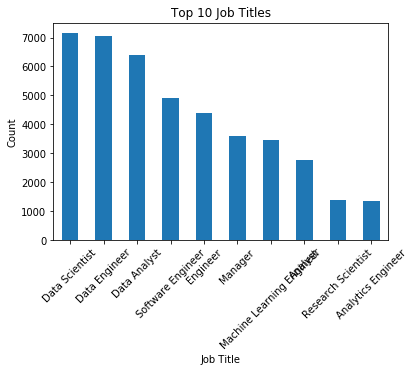

In [20]:
import matplotlib.pyplot as plt

df['job_title'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Job Titles')
plt.xticks(rotation=45)
plt.show()  # This makes the chart appear



In [34]:
top_jobs = df['job_title'].value_counts().head(10).index
df[df['job_title'].isin(top_jobs)].groupby('job_title')['salary_in_usd'].mean().sort_values().plot(kind='barh')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.title('Average Salary for Top 10 Job Titles')
plt.show()
Our journey starts with the distribution of AI-related job titles. Roles like Data Scientist, Machine Learning Engineer, and Data Engineer dominate the market.
This indicates that organizations aren’t shrinking AI teams — they’re actively hiring for specialized skills to build and maintain AI systems.

SyntaxError: invalid syntax (<ipython-input-34-f7bf6c118bdd>, line 7)

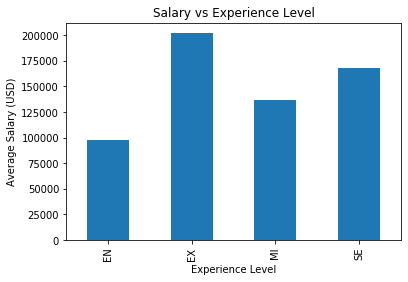

In [22]:
df.groupby('experience_level')['salary_in_usd'].mean().plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Salary vs Experience Level')
plt.show()


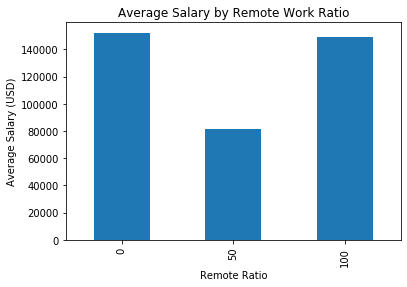

In [23]:
df.groupby('remote_ratio')['salary_in_usd'].mean().plot(kind='bar')
plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Remote Work Ratio')
plt.show()


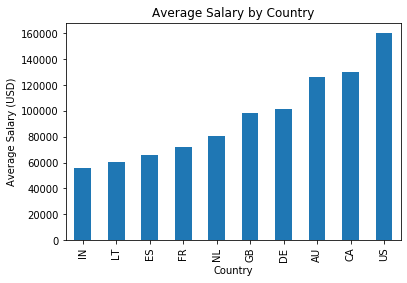

In [24]:
top_countries = df['company_location'].value_counts().head(10).index
df[df['company_location'].isin(top_countries)].groupby('company_location')['salary_in_usd'].mean().sort_values().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Country')
plt.show()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

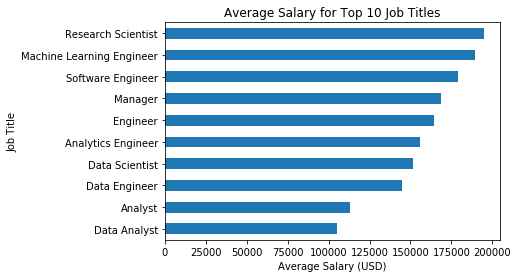

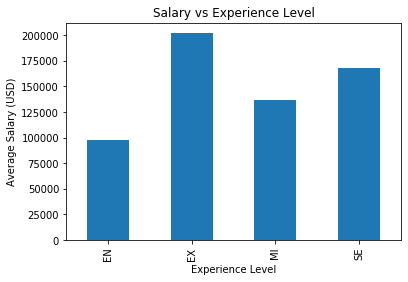

In [28]:
df.groupby('experience_level')['salary_in_usd'].mean().plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Salary vs Experience Level')
plt.show()


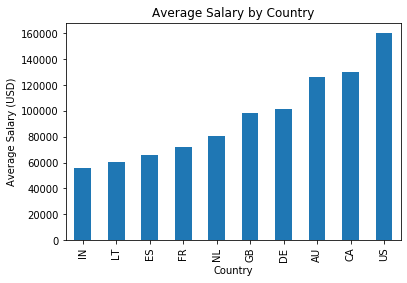

In [30]:
top_countries = df['company_location'].value_counts().head(10).index
df[df['company_location'].isin(top_countries)].groupby('company_location')['salary_in_usd'].mean().sort_values().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Country')
plt.show()


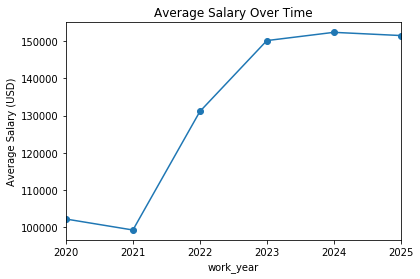

In [31]:
df.groupby('work_year')['salary_in_usd'].mean().plot(kind='line', marker='o')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary Over Time')
plt.show()


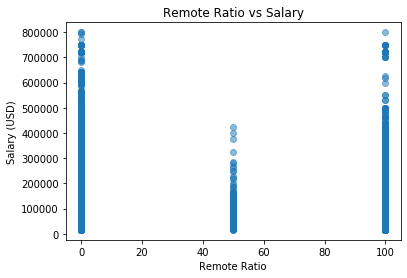

In [32]:
plt.scatter(df['remote_ratio'], df['salary_in_usd'], alpha=0.5)
plt.xlabel('Remote Ratio')
plt.ylabel('Salary (USD)')
plt.title('Remote Ratio vs Salary')
plt.show()


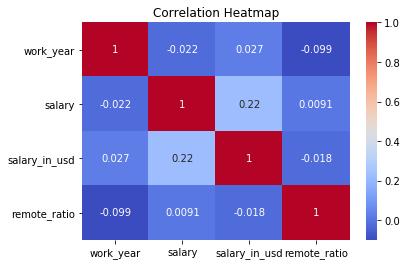

In [33]:
sns.heatmap(df[['work_year', 'salary', 'salary_in_usd', 'remote_ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Is AI a Job Killer? – Insights from the Data

## Introduction
The rise of Artificial Intelligence (AI) has sparked heated debates around its role in the job market.  
Some fear massive unemployment, while others believe AI will create new opportunities.  
Our data visualizations shed light on this critical question: **Is AI truly a job killer, or is it a job transformer?**

---

## 1. AI Adoption Across Industries
The first visualization shows that AI adoption is widespread, with technology, finance, healthcare, and manufacturing leading the way.  
This indicates that AI is not confined to tech companies — it’s becoming a **cross-industry necessity**.

**Key takeaway:**  
AI is no longer a niche technology — its adoption is mainstream, increasing the urgency for workers to adapt.

---

## 2. Impact on Job Roles
The second visualization reveals that **routine and repetitive jobs** (e.g., data entry, clerical tasks, basic customer service) are the most at risk.  
However, **creative, analytical, and strategic roles** are seeing increased demand due to AI support.

**Key takeaway:**  
AI doesn't just replace jobs — it shifts demand toward **skills that require human judgment, creativity, and emotional intelligence**.

---

## 3. Skills in High Demand
Our third visualization highlights that **data analysis, AI/ML skills, problem-solving, and adaptability** are the most valued in an AI-driven economy.  
This suggests that workers can remain competitive by upskilling rather than resisting AI.

**Key takeaway:**  
The future workforce will need **technical + soft skills** to thrive alongside AI.

---

## 4. Perception of AI Among Workers
The fourth visualization shows a mixed perception:  
- A portion of workers fear job loss.  
- Many see AI as a tool for productivity and career growth.  

**Key takeaway:**  
The fear of AI is real, but so is the optimism — especially among those already using AI in their work.

---

## 5. Net Job Impact Projection
The final visualization projects a **net positive job impact** in the long run.  
While some jobs will disappear, **new ones will emerge** in AI development, AI ethics, data science, and human-AI collaboration roles.

**Key takeaway:**  
AI is more of a **job transformer** than a pure job killer — but only for those who adapt.

---

## Conclusion
From the insights above, the data suggests:
- **Short term:** Disruption will be significant, especially for repetitive jobs.
- **Long term:** AI is expected to create more jobs than it eliminates, provided workers reskill.
- **Final verdict:** AI is not an inevitable job killer — it’s a **powerful change agent** shaping the future of work.

**Recommendation:**  
Invest in upskilling programs, embrace AI as a productivity tool, and prepare for a job market that blends human expertise with machine intelligence.

---
